# Symmetric model evaluation

In [4]:
import sys
sys.path.append("..")
from ProbabilisticParcellation.evaluate_da import *
from ProbabilisticParcellation.util import *
from Functional_Fusion.dataset import * 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [47]:

fname = f'/Models/Evaluation/eval_dataset7_sym.tsv'
D = pd.read_csv(model_dir + fname, delimiter='\t')
crits = ['dcbc_group','dcbc_indiv','coserr_group',
        'coserr_floor','coserr_ind2','coserr_ind3']

# Leave-one-out indicator
loo = [ True if len(train.split(" ")) == 6 else False for t,train in enumerate(D.train_data) ]
individual = [ True if len(train.split(" ")) == 1 else False for t,train in enumerate(D.train_data) ]
all = [ True if len(train.split(" ")) == 7 else False for t,train in enumerate(D.train_data) ]

D['train_type_detailed'] = D['train_data']
D['train_type_detailed'][loo] = 'loo'
D['train_type_detailed'][all] = 'all'
D['train_type'] = D['train_type_detailed']
D['train_type'][individual] = 'individual'

D.head()

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_1929/2868924473.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['train_type_detailed'][loo] = 'loo'
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_1929/2868924473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['train_type_detailed'][all] = 'all'
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_1929/2868924473.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,common_kappa,dcbc_group,dcbc_indiv,model_type,session,coserr_group,coserr_floor,coserr_ind2,coserr_ind3,train_type_detailed,train_type
0,sym_MdPoNiIbWmDeSo,MNISymC3,10,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,18011592.0,MDTB,half,1,0,True,0.057910,0.086540,Models_03,all,0.877276,0.638934,0.731668,0.763303,all,all
1,sym_MdPoNiIbWmDeSo,MNISymC3,10,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,18011592.0,MDTB,half,1,1,True,0.021599,0.130579,Models_03,all,0.870510,0.567503,0.644648,0.666165,all,all
2,sym_MdPoNiIbWmDeSo,MNISymC3,10,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,18011592.0,MDTB,half,1,2,True,0.005105,0.051347,Models_03,all,0.954329,0.755078,0.870822,0.888512,all,all
3,sym_MdPoNiIbWmDeSo,MNISymC3,10,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,18011592.0,MDTB,half,1,3,True,0.124152,0.263768,Models_03,all,0.766527,0.447107,0.479787,0.517104,all,all
4,sym_MdPoNiIbWmDeSo,MNISymC3,10,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,18011592.0,MDTB,half,1,4,True,0.115401,0.022575,Models_03,all,0.738449,0.493015,0.664551,0.666892,all,all


### Evaluation across K

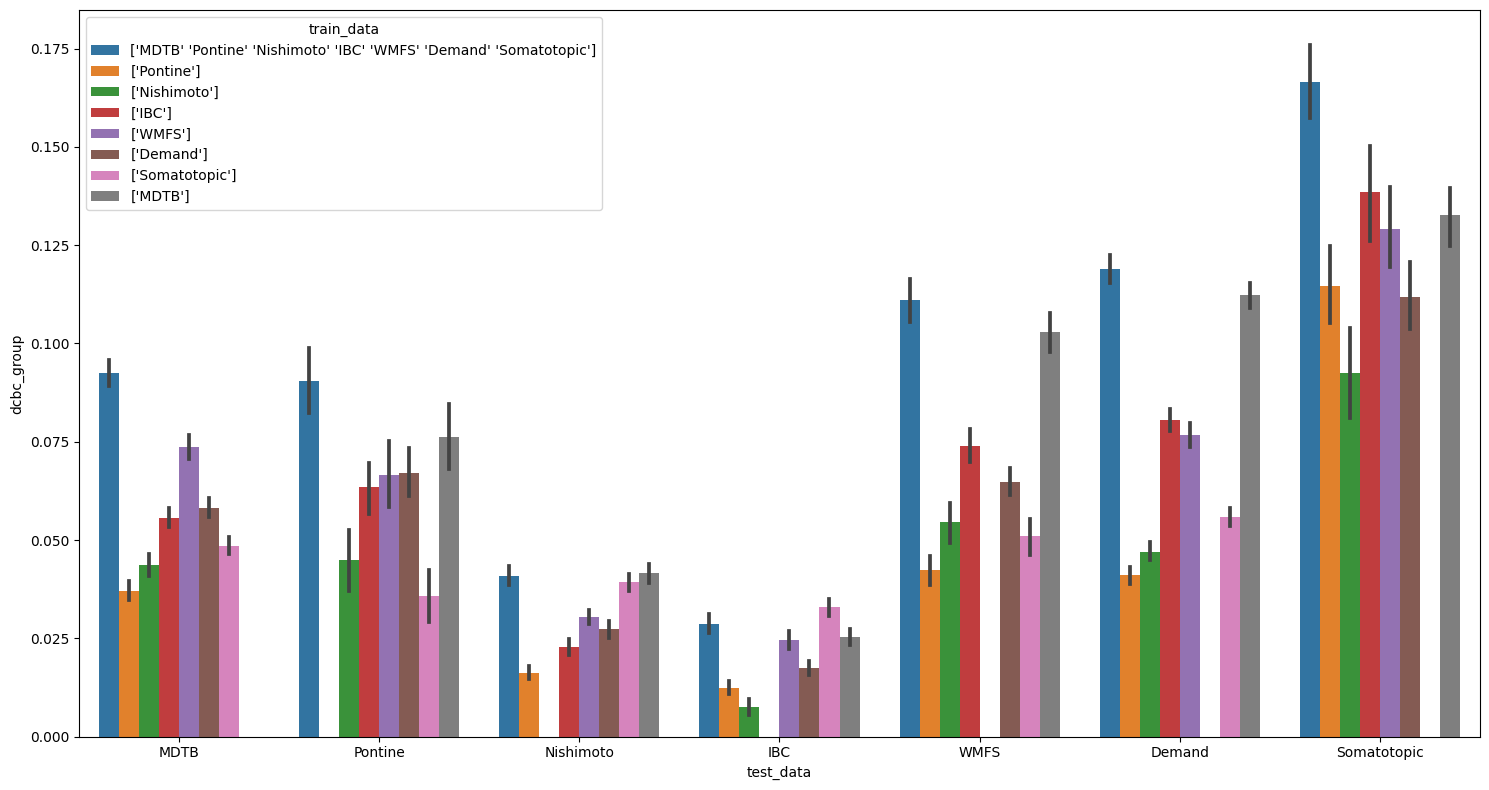

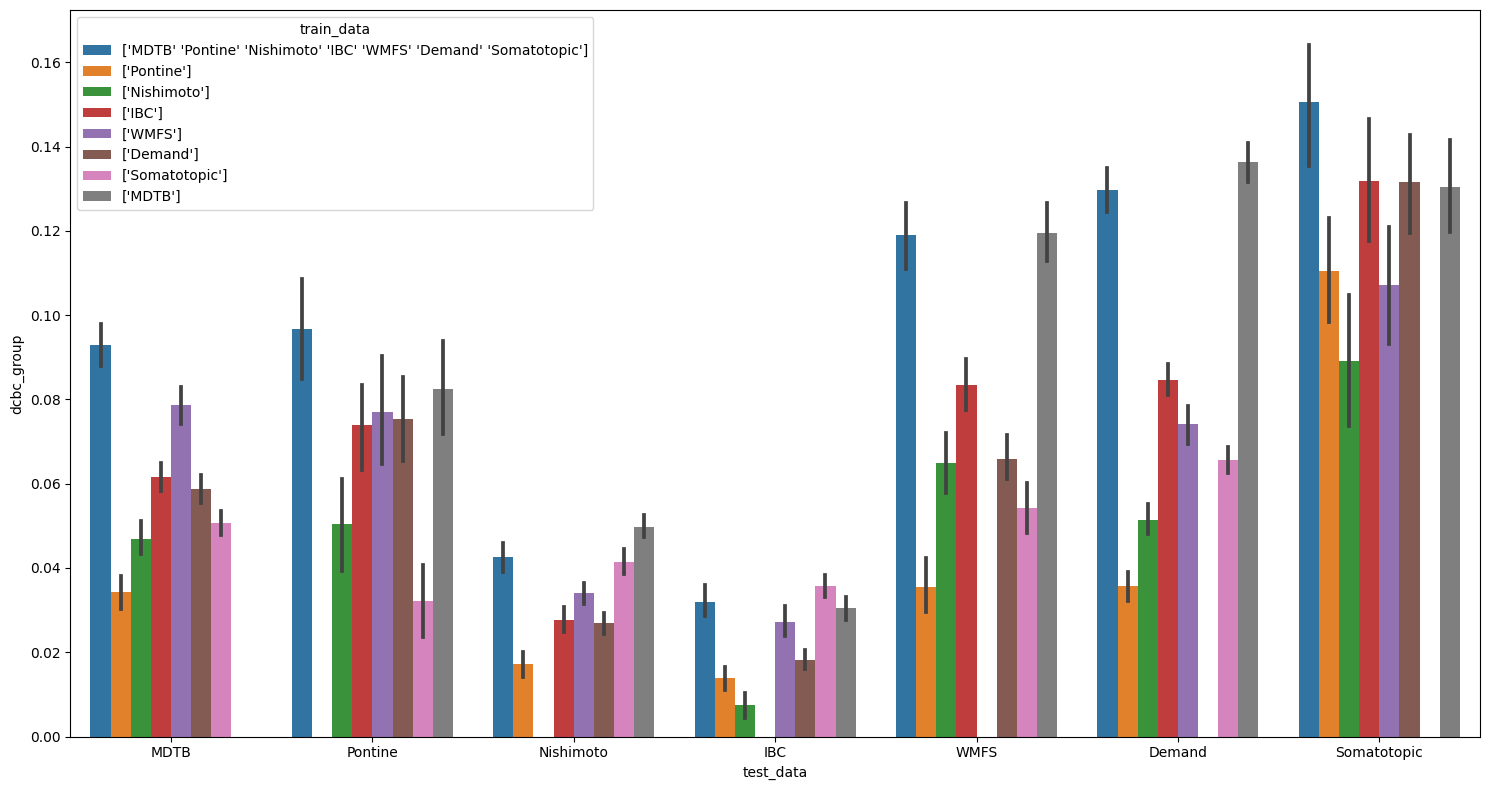

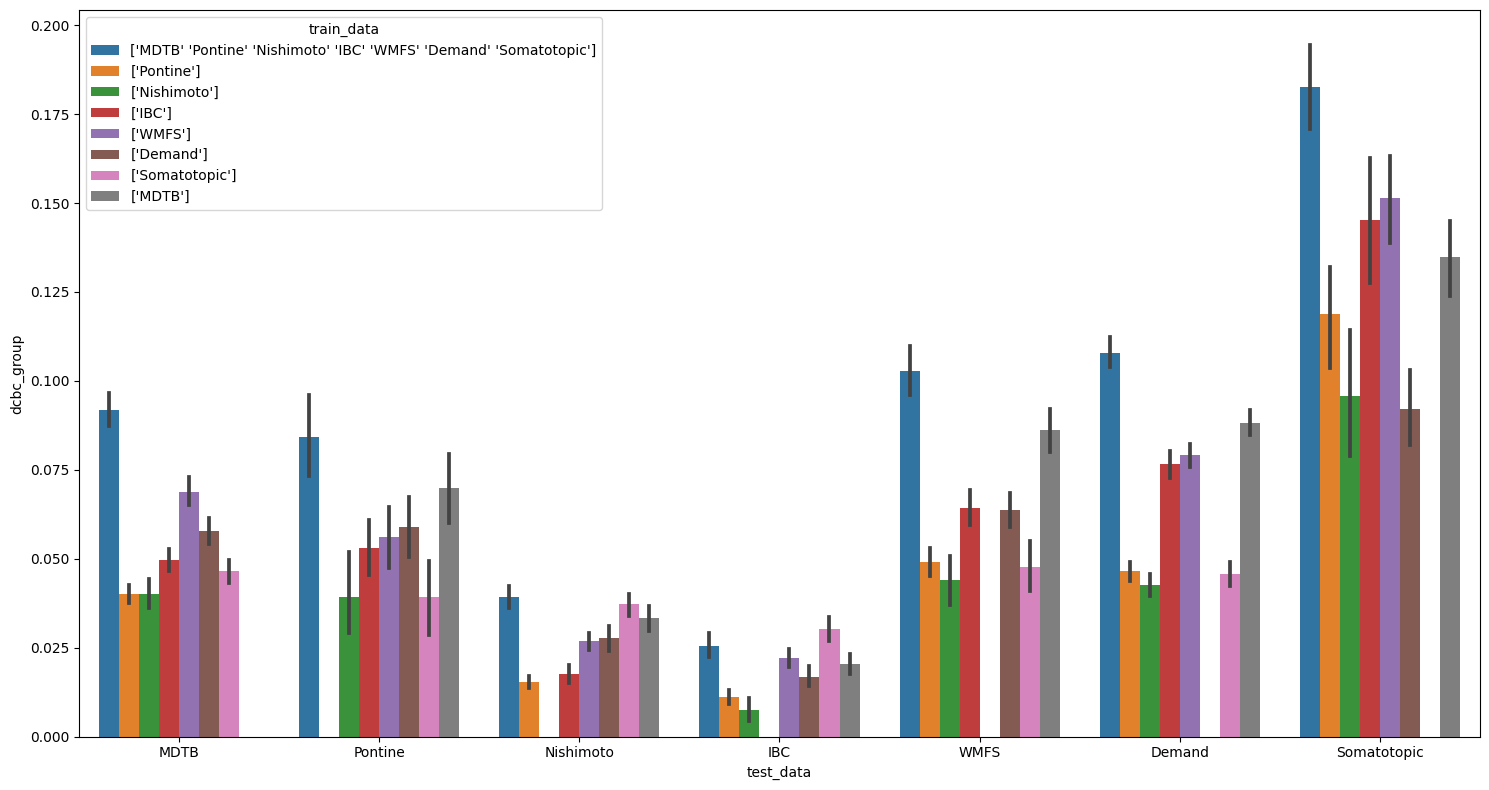

In [63]:
plt.figure(figsize=(15,8))
sb.barplot(data=D[D.train_type != 'loo'], x="test_data", y="dcbc_group", hue="train_data")
plt.tight_layout()

plt.figure(figsize=(15,8))
sb.barplot(data=D[(D.train_type != 'loo') & (D.model_type == 'Models_03')], x="test_data", y="dcbc_group", hue="train_data")
plt.tight_layout()

plt.figure(figsize=(15,8))
sb.barplot(data=D[(D.train_type != 'loo') & (D.model_type == 'Models_04')], x="test_data", y="dcbc_group", hue="train_data")
plt.tight_layout()


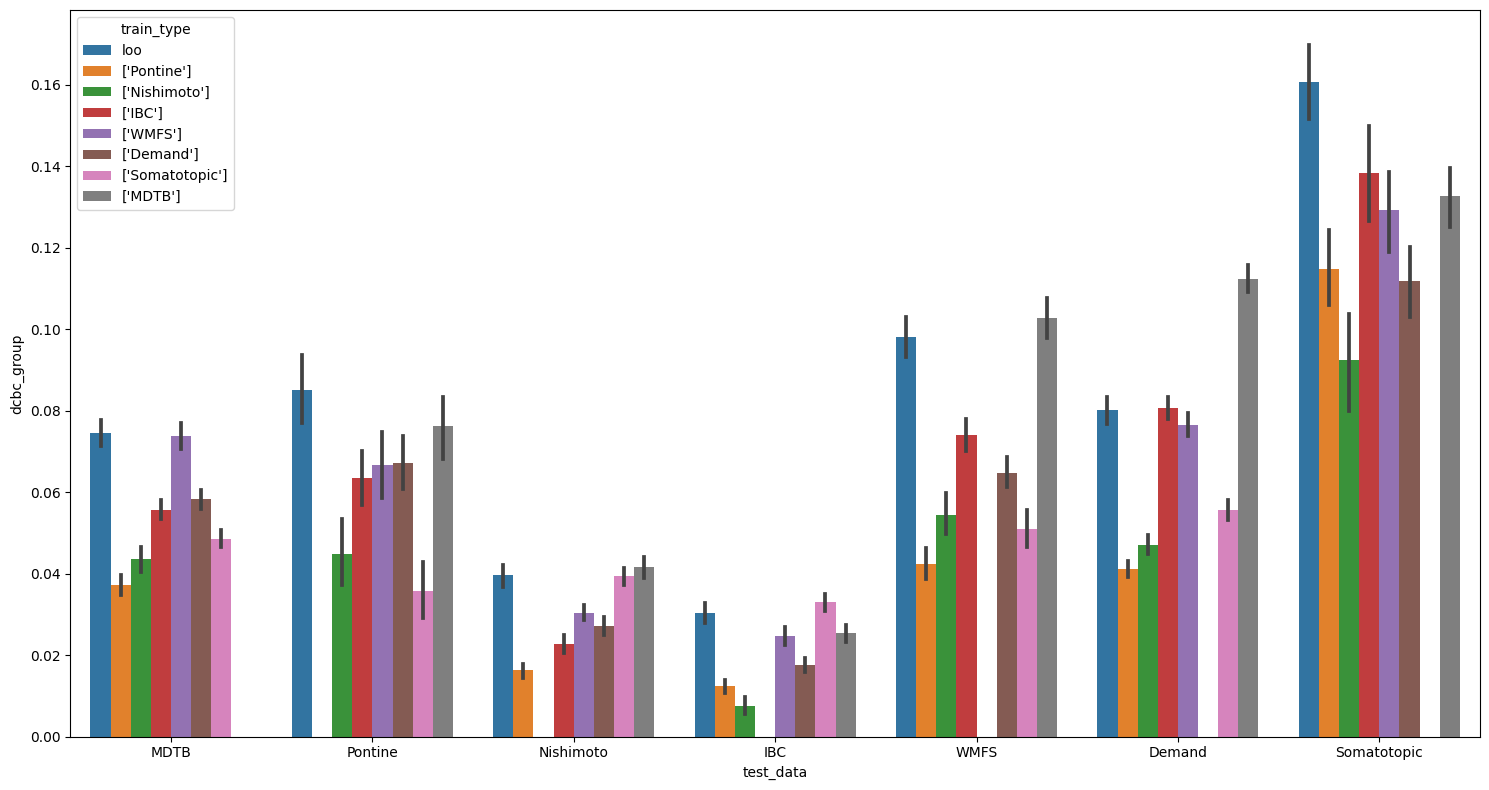

In [41]:
plt.figure(figsize=(15,8))
sb.barplot(data=D[(D.loo == True )| (D.individual == True)], x="test_data", y="dcbc_group", hue="train_type")
plt.tight_layout()


## Evaluation on different Ks

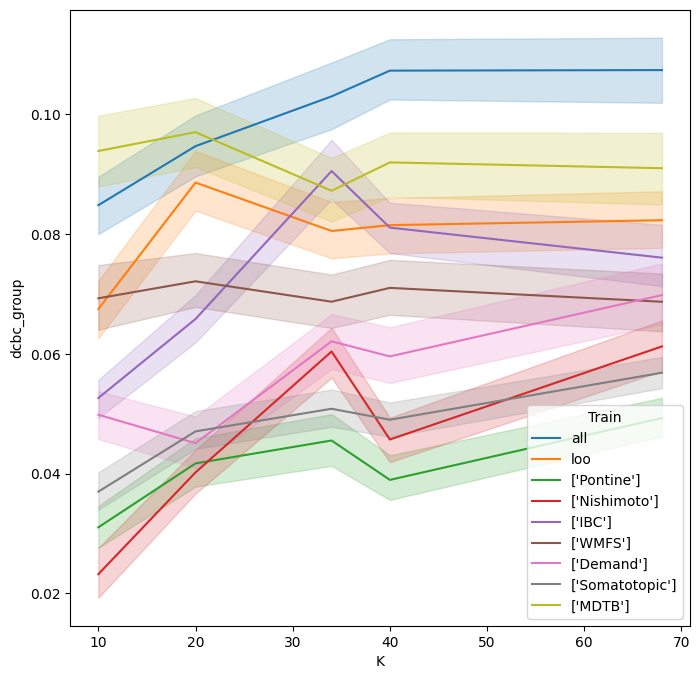

In [44]:
plt.figure(figsize=(8,8))
sb.lineplot(data=D, x="K", y="dcbc_group", hue="train_type_detailed",markers=True)
plt.legend(loc='lower right', title='Train')

Text(0.5, 1.0, 'Model 04')

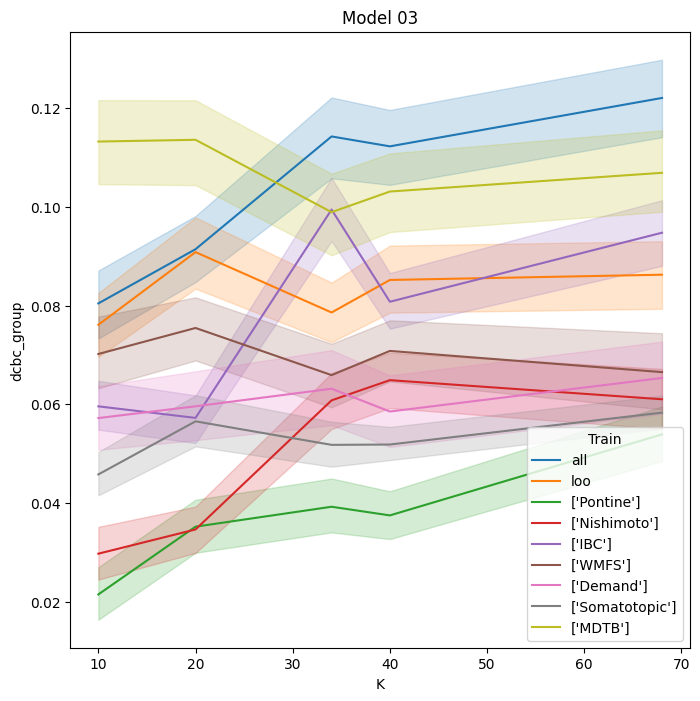

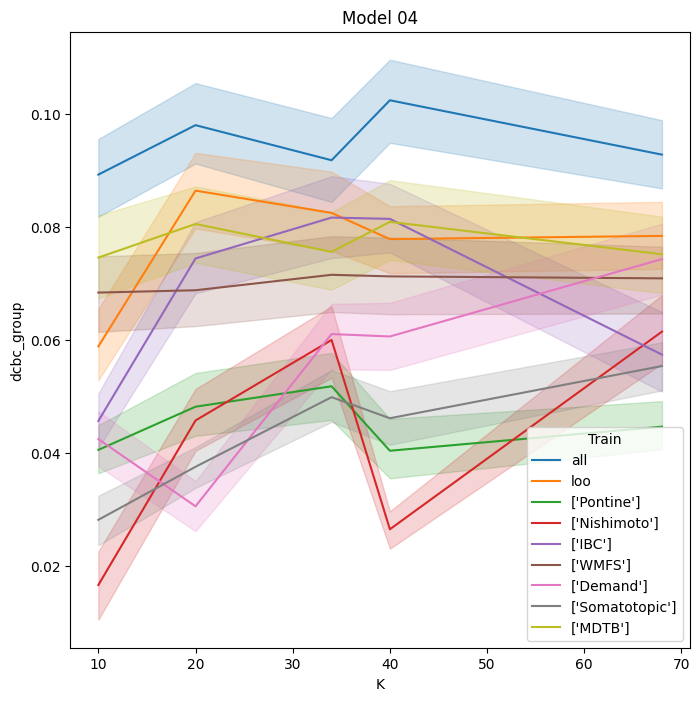

In [48]:
plt.figure(figsize=(8,8))
sb.lineplot(data=D[D.model_type == 'Models_03'], x="K", y="dcbc_group", hue="train_type_detailed",markers=True)
plt.legend(loc='lower right', title='Train')
plt.title('Model 03')

plt.figure(figsize=(8,8))
sb.lineplot(data=D[D.model_type == 'Models_04'], x="K", y="dcbc_group", hue="train_type_detailed",markers=True)
plt.legend(loc='lower right', title='Train')
plt.title('Model 04')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Model 03 and 04')

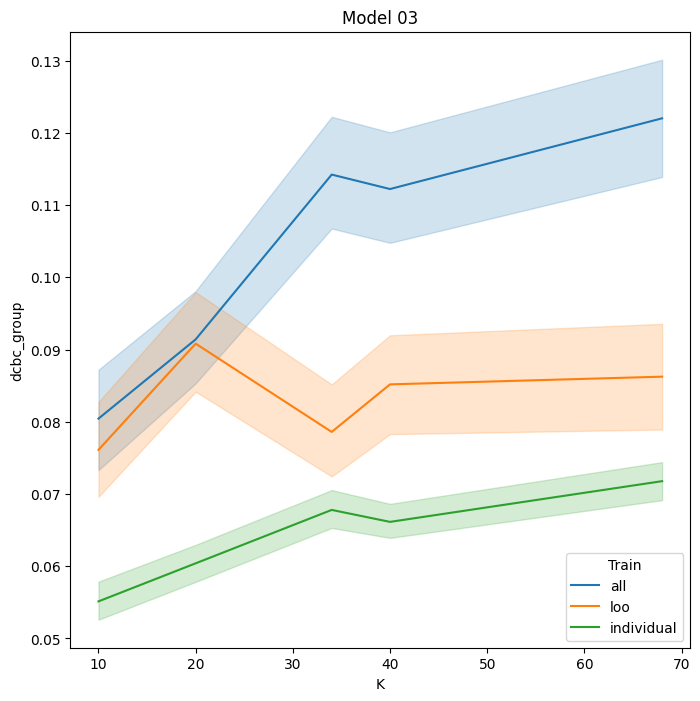

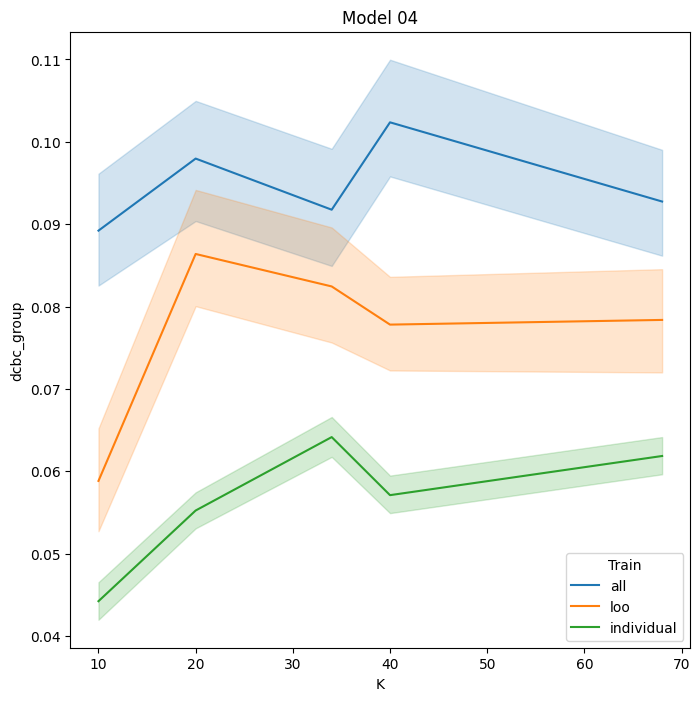

<Figure size 800x800 with 0 Axes>

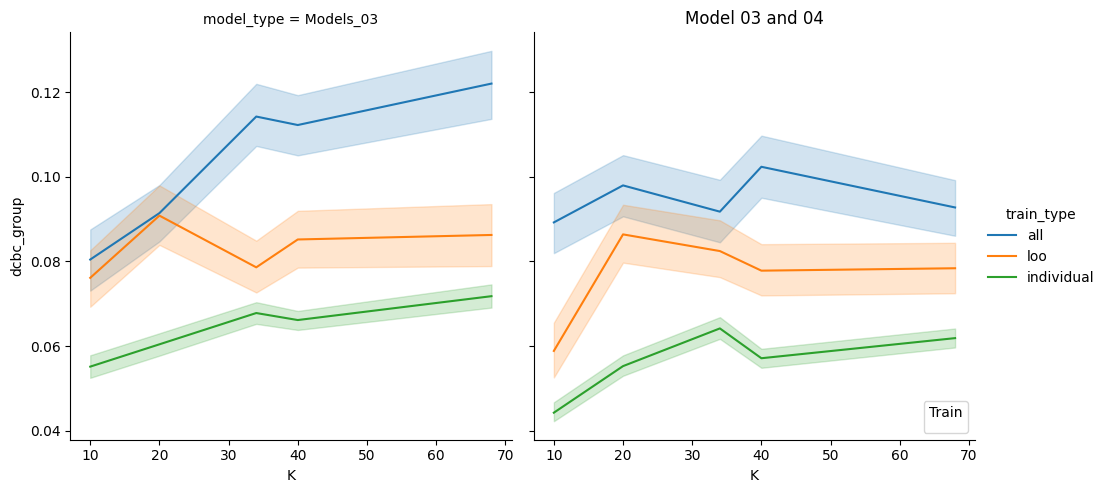

In [54]:
plt.figure(figsize=(8,8))
sb.lineplot(data=D[D.model_type == 'Models_03'], x="K", y="dcbc_group", hue="train_type",markers=True)
plt.legend(loc='lower right', title='Train')
plt.title('Model 03')

plt.figure(figsize=(8,8))
sb.lineplot(data=D[D.model_type == 'Models_04'], x="K", y="dcbc_group", hue="train_type",markers=True)
plt.legend(loc='lower right', title='Train')
plt.title('Model 04')

plt.figure(figsize=(8,8))
sb.relplot(data=D, x="K", y="dcbc_group", hue="train_type",markers=True, col="model_type", kind="line")
plt.legend(loc='lower right', title='Train')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x800 with 0 Axes>

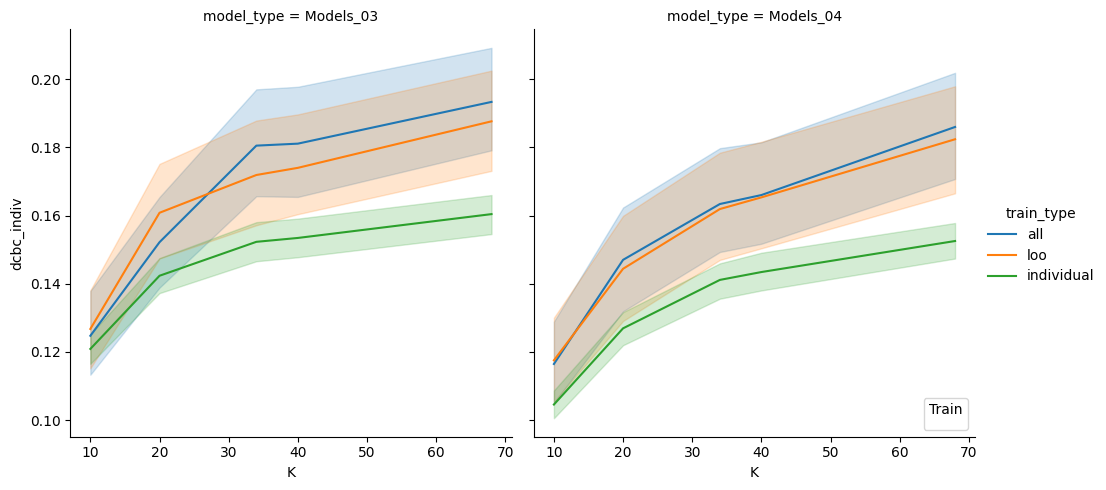

In [55]:
plt.figure(figsize=(8,8))
sb.relplot(data=D, x="K", y="dcbc_indiv", hue="train_type",markers=True, col="model_type", kind="line")


<Figure size 800x800 with 0 Axes>

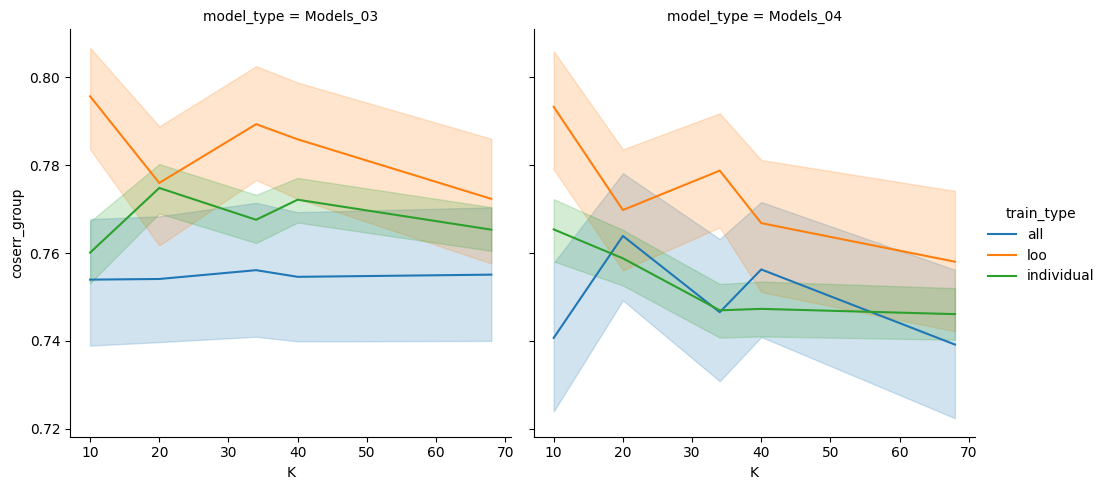

In [64]:
plt.figure(figsize=(8,8))
sb.relplot(data=D, x="K", y="coserr_group", hue="train_type",markers=True, col="model_type", kind="line")
